# Motivation

`pyoctinion` and `pyquaternion` do not work with jax.

I need octinions and quaternions for my research.



In [1]:
import jax.numpy as jnp
import jax

In [2]:
import octo

In [3]:
octo.j

Octonions, shape=(1, 8), first one is (0.0, 0.0i, 1.0j, 0.0k, 0.0l, 0.0li, 0.0lj, 0.0lk)

In [4]:
raw_k = octo.k.to_jnp()
raw_k


Array([[0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [5]:
jnp.ndarray?

In [6]:
octo.raw_mul(octo.raw_unit,octo.raw_l)


Array([[0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [7]:
octo.octo_mul(octo.unit,octo.l)


Octonions, shape=(1, 8), first one is (0.0, 0.0i, 0.0j, 0.0k, 1.0l, 0.0li, 0.0lj, 0.0lk)

In [8]:
octo.i*octo.k


Octonions, shape=(1, 8), first one is (0.0, 0.0i, 0.0j, 0.0k, 0.0l, 0.0li, 0.0lj, 1.0lk)

In [9]:
dz = jax.jacobian(fun=octo.raw_mul,argnums=1)
dbda = dz(octo.raw_i,octo.raw_unit)
dbda

Array([[[[ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]],

        [[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]],

        [[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]]]], dtype=float32)

In [13]:
octo.unit * octo.k

Octonions, shape=(1, 8), first one is (0.0, 0.0i, 0.0j, 1.0k, 0.0l, 0.0li, 0.0lj, 0.0lk)

as per:

https://www.euclideanspace.com/maths/algebra/realNormedAlgebra/octonion/index.htm



In [16]:
a1 = octo.Octonion(jnp.array([1,0,0,0,0,0,0,0]))
a2 = octo.Octonion(jnp.array([0,1,0,0,0,0,0,0]))
a2
a1+a2

Octonions, shape=(1, 8), first one is (1.0, 1.0i, 0.0j, 0.0k, 0.0l, 0.0li, 0.0lj, 0.0lk)

In [ ]:
a1*a1

In [ ]:
128*127*(7/8)

In [ ]:
jnp.linalg.norm

In [ ]:
a8.norm

In [ ]:
import jax.nn
jax.nn.leaky_relu?

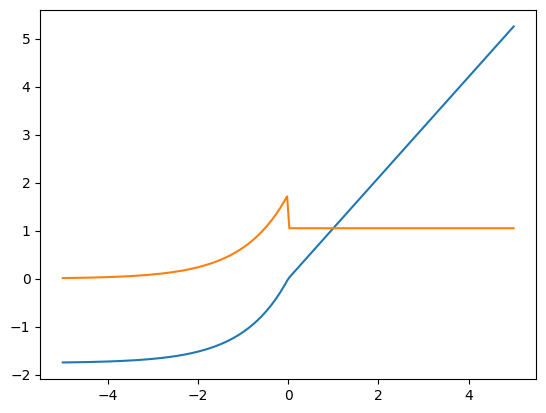

In [17]:
x = jnp.linspace(-5,5,200)
fn = jax.nn.selu
dfn = jax.grad(fn)
y = jnp.array([fn(e) for e in x])
dy = jnp.array([dfn(e) for e in x])
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(x,dy)

In [21]:
jax.nn.selu?

In [29]:
jax.nn.selu(octo.raw_unit-4*octo.raw_i)

Array([[ 1.050701 , -1.7258987,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ]], dtype=float32)

In [104]:
# FRONTIER: THis doesn't quite work yet, -- the next issue is how to get scaling operation (octo+float) through the jax tracer
def FFNglu(x,A,b,C,d):
    """
    
    :param x: the value vector to process 
    :param A: 
    :param b: 
    :param C: 
    :param d: 
    :return: 
    """
    #y = jax.nn.selu(((octo.Octonion(x)*octo.Octonion(A))+b).to_jnp())*(octo.Octonion(x)*octo.Octonion(C)+d)
    y = (octo.Octonion(jax.nn.selu(((octo.Octonion(x)*octo.Octonion(A))+b).to_jnp()))*(octo.Octonion(x)*octo.Octonion(C)+d)).to_jnp()
    return y

FFNglu(octo.raw_unit, octo.raw_i, 0.0, octo.raw_j, 0.0)


Array([[0.      , 0.      , 0.      , 0.      , 1.050701, 0.      ,
        0.      , 0.      ]], dtype=float32)

In [106]:
jax.grad(FFNglu,argnums=2)(octo.raw_unit, octo.raw_i, 0.0, octo.raw_j, 0.0)

ValueError: type(other)=<class 'jax._src.interpreters.ad.JVPTracer'>

In [107]:
jax._src.interpreters.ad.JVPTracer?

In [79]:
octo.raw_

Array([[0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [56]:
octo.raw_j

Array([[0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)